# Problem Statement
    Predict Whether the client has subscribed a term deposit or not - Binomial ("yes" or "no") 
##### Attribute information For bank dataset
       1 - age (numeric)
       2 - job : type of job (categorical:"admin.","unknown","unemployed","management","housemaid","entrepreneur", 
                                          "student","blue-collar","self-employed","retired","technician","services") 
       3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
       4 - education (categorical: "unknown","secondary","primary","tertiary")
       5 - default: has credit in default? (binary: "yes","no")
       6 - balance: average yearly balance, in euros (numeric) 
       7 - housing: has housing loan? (binary: "yes","no")
       8 - loan: has personal loan? (binary: "yes","no")
##### related with the last contact of the current campaign:
       9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
      10 - day: last contact day of the month (numeric)
      11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
      12 - duration: last contact duration, in seconds (numeric)
##### other attributes:
      13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
      14 - pdays: number of days that passed by after the client was last contacted from a previous campaign 
                 (numeric, -1 means client was not previously contacted)
      15 - previous: number of contacts performed before this campaign and for this client (numeric)
      16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
##### Output variable (desired target):
      17 - y - has the client subscribed a term deposit? (binary: "yes","no")
##### Missing Attribute Values: None

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

# Importing Data

In [2]:
raw_data = pd.read_csv('bank-full.csv', sep = ';')
raw_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Undestanding and Cleaning

In [3]:
raw_data = raw_data.replace('unknown', np.nan)
raw_data = raw_data.dropna(how='any', axis=0) 

In [4]:
raw_data = raw_data.reset_index(drop = True)

In [5]:
data = raw_data.drop(['contact','day','month'],axis = 1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7842 entries, 0 to 7841
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7842 non-null   int64 
 1   job        7842 non-null   object
 2   marital    7842 non-null   object
 3   education  7842 non-null   object
 4   default    7842 non-null   object
 5   balance    7842 non-null   int64 
 6   housing    7842 non-null   object
 7   loan       7842 non-null   object
 8   duration   7842 non-null   int64 
 9   campaign   7842 non-null   int64 
 10  pdays      7842 non-null   int64 
 11  previous   7842 non-null   int64 
 12  poutcome   7842 non-null   object
 13  y          7842 non-null   object
dtypes: int64(6), object(8)
memory usage: 857.8+ KB


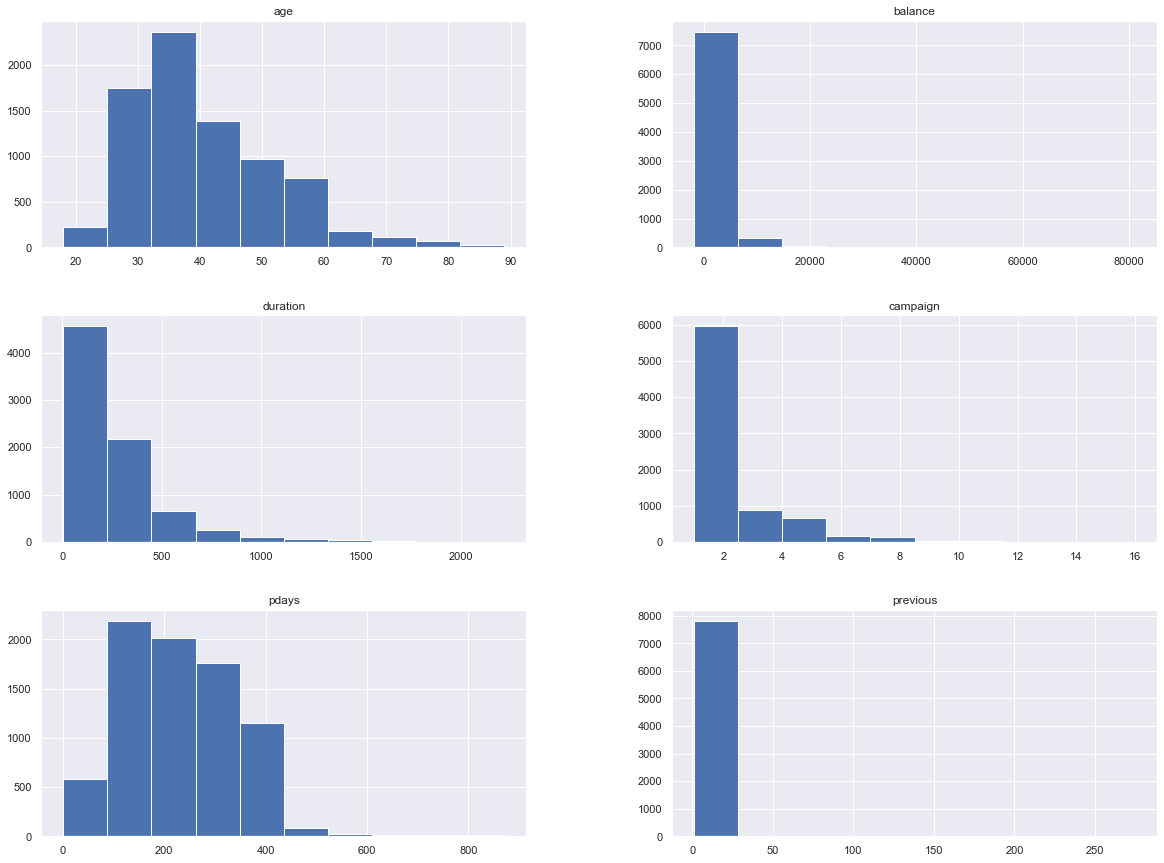

In [7]:
data.hist(figsize = (20,15))
plt.show()

# Data Preprocessing
    Standardizing Numerical Variables
    Encoding Categorical Variables

In [24]:
data_num = data.drop(['job','marital','education','default','housing','loan','poutcome','y'], axis = 1)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [26]:
num_attribs = list(data_num)
cat_attribs = ['job','marital','education','default','housing','loan','poutcome']
labels = ['y']
pipeline = ColumnTransformer([("num", StandardScaler(), num_attribs),
                              ("cat", OneHotEncoder(drop= 'first'), cat_attribs),
                              ("targets", OneHotEncoder(drop='first'), labels)
                             ])
data_prepared = pipeline.fit_transform(data)

In [28]:
data_prepared

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.689921,-0.217335,-0.941159,-0.679606,-0.646136,-0.039937,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.107793,-0.583372,1.091119,-0.679606,-0.511995,-0.473410,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,-0.689921,0.613301,-0.496598,-0.679606,-1.182698,0.176800,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.424016,0.279685,-0.797206,-0.679606,-1.227412,0.176800,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.424016,-0.503291,-0.513534,-0.679606,-0.717678,-0.039937,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,-0.601286,-0.025076,3.830460,0.597526,2.743149,1.910693,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7838,1.082776,-0.314275,-0.149417,-0.679606,-0.351027,0.176800,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
7839,2.855473,0.420718,0.163892,-0.679606,-1.638776,1.043746,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7840,2.766838,1.349591,3.665337,1.874657,-0.351027,-0.039937,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [27]:
data_prepared = pd.DataFrame(data_prepared)
data_prepared.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.689921,-0.217335,-0.941159,-0.679606,-0.646136,-0.039937,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.107793,-0.583372,1.091119,-0.679606,-0.511995,-0.473410,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,-0.689921,0.613301,-0.496598,-0.679606,-1.182698,0.176800,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.424016,0.279685,-0.797206,-0.679606,-1.227412,0.176800,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.424016,-0.503291,-0.513534,-0.679606,-0.717678,-0.039937,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [12]:
inputs = data_prepared.drop(25, axis = 1)
target = data_prepared[25]

# Splitting The Data

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365)

# Model Building

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

## Classification Predictions

In [16]:
y_pred = log_reg.predict(x_train)

## Probability Predictions

In [17]:
y_pred_prob = log_reg.predict_proba(x_train)

## Confusion Matrix

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
confusion_matrix(y_train, y_pred)

array([[4550,  316],
       [ 671,  736]], dtype=int64)

## Classification Report

In [20]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      4866
         1.0       0.70      0.52      0.60      1407

    accuracy                           0.84      6273
   macro avg       0.79      0.73      0.75      6273
weighted avg       0.83      0.84      0.83      6273



# Testing

In [21]:
y_test_pred = log_reg.predict(x_test)

In [22]:
confusion_matrix(y_test, y_test_pred)

array([[1098,   92],
       [ 191,  188]], dtype=int64)

In [23]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.89      1190
         1.0       0.67      0.50      0.57       379

    accuracy                           0.82      1569
   macro avg       0.76      0.71      0.73      1569
weighted avg       0.81      0.82      0.81      1569

